In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv("extracted_data.csv")
data.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,77.888310,187.195404,83.335982,30.684424,106.580359,40.805238,231.0
1,14861698,1,23.433923,165.714073,59.716414,13.750093,92.369690,40.187844,66.0
2,11179863,0,72.051558,183.050493,72.738073,10.137462,88.393519,38.669697,26.0
3,16180408,1,37.428200,185.676526,64.174637,10.408347,96.621718,40.480983,71.0
4,17771927,1,38.363667,139.244726,51.499487,14.093483,85.108652,40.046973,35.0


In [ ]:
X = data.drop(columns=['User_ID','Calories'], axis=1)
Y = data['Calories']

In [ ]:
print(X)

       Gender        Age      Height      Weight   Duration  Heart_Rate  \
0           0  77.888310  187.195404   83.335982  30.684424  106.580359   
1           1  23.433923  165.714073   59.716414  13.750093   92.369690   
2           0  72.051558  183.050493   72.738073  10.137462   88.393519   
3           1  37.428200  185.676526   64.174637  10.408347   96.621718   
4           1  38.363667  139.244726   51.499487  14.093483   85.108652   
...       ...        ...         ...         ...        ...         ...   
14995       1   9.900182  200.594821   87.121918   9.326348   92.101175   
14996       1  21.495879  156.485776   55.957182   3.191773   87.789054   
14997       1  33.694156  159.057509   51.080532  18.475312   91.604588   
14998       0  81.275422  191.239711  101.976274   2.514394   82.236189   
14999       0  65.699941  173.041918   83.662627  15.355937   91.207545   

       Body_Temp  
0      40.805238  
1      40.187844  
2      38.669697  
3      40.480983  
4   

In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


LINEAR REGRESSION

In [ ]:
#Linear Regression
linear=LinearRegression()
linear.fit(X_train,Y_train)
linear_result_test=linear.predict(X_test)
print(linear_result_test)
linear_result_train=linear.predict(X_train)
print(linear_result_train)

[105.22145022 194.78657812  73.12075908 ... 162.11588873  30.26094605
  97.98847911]
[  6.54708277  40.92863289  36.17016412 ...  97.82425299 188.43885981
  70.9879977 ]


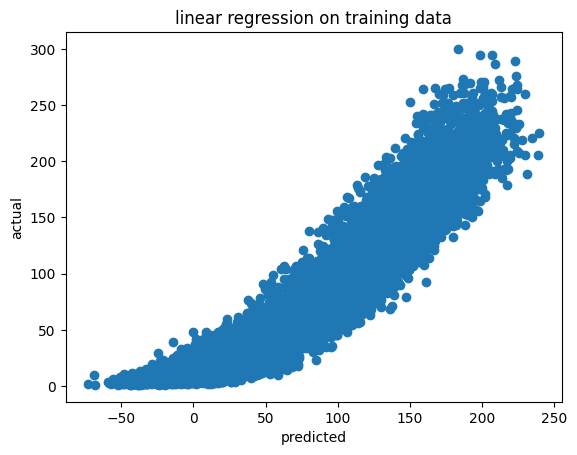

In [ ]:
plt.scatter(linear_result_train,Y_train)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("linear regression on training data")
plt.show()

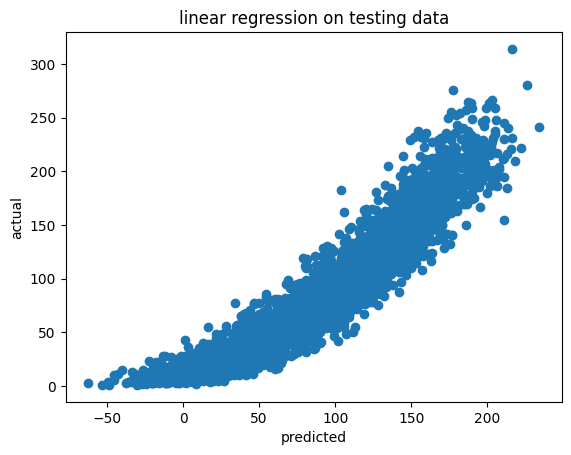

In [ ]:
plt.scatter(linear_result_test,Y_test)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("linear regression on testing data")
plt.show()

In [ ]:
linear_acc_train=r2_score(linear_result_train,Y_train)
print("training accuracy ",linear_acc_train)
linear_acc_test=r2_score(linear_result_test,Y_test)
print("testing accuracy ",linear_acc_test)


training accuracy  0.8637175199097742
testing accuracy  0.8590444197806173


LASSO REGRESSION


In [ ]:
#Lasso Regression
lasso=linear_model.Lasso()
lasso.fit(X_train,Y_train)
lasso_result_test=lasso.predict(X_test)
print(lasso_result_test)
lasso_result_train=lasso.predict(X_train)
print(lasso_result_train)

[103.76547738 197.10208204  75.78242561 ... 165.05122838  30.84840081
  96.84003778]
[ 10.13449562  39.72645751  36.24697146 ...  98.09341201 189.98106616
  70.11079934]


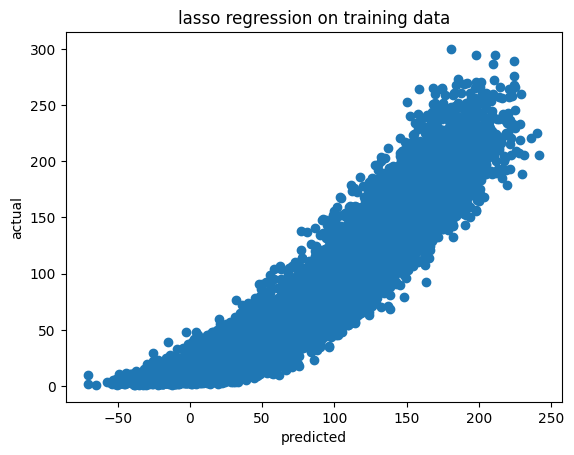

In [ ]:
plt.scatter(lasso_result_train,Y_train)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("lasso regression on training data")
plt.show()

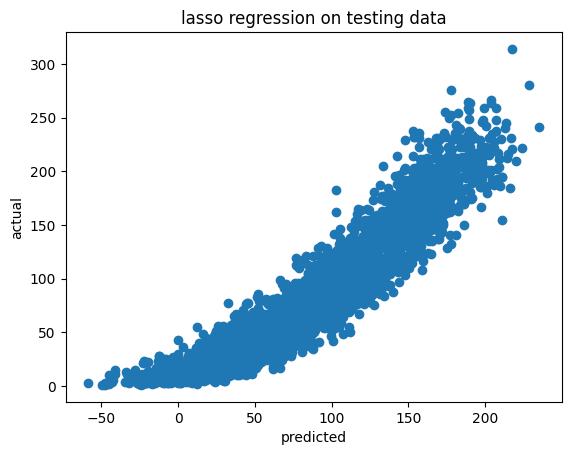

In [ ]:
plt.scatter(lasso_result_test,Y_test)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("lasso regression on testing data")
plt.show()

In [ ]:
lasso_acc_train=r2_score(lasso_result_train,Y_train)
print("training accuracy ",lasso_acc_train)
lasso_acc_test=r2_score(lasso_result_test,Y_test)
print("testing accuracy ",lasso_acc_test)


training accuracy  0.861753805145958
testing accuracy  0.8566873360146813


RANDOM FOREST


In [ ]:
#RandomForest Regression
rf = RandomForestRegressor(max_depth=5, random_state=0)
rf.fit(X_train,Y_train)
rf_result_test=rf.predict(X_test)
print(rf_result_test)
rf_result_train=rf.predict(X_train)
print(rf_result_train)

[ 92.58819557 215.14438998  60.89856198 ... 183.78934797  23.76468547
  76.82169579]
[  8.24196294  47.06125277  21.84026913 ...  90.75506375 187.08426738
  63.80259893]


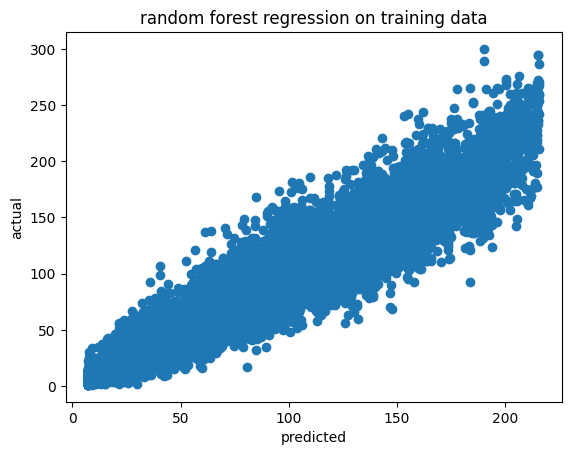

In [ ]:
plt.scatter(rf_result_train,Y_train)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("random forest regression on training data")
plt.show()

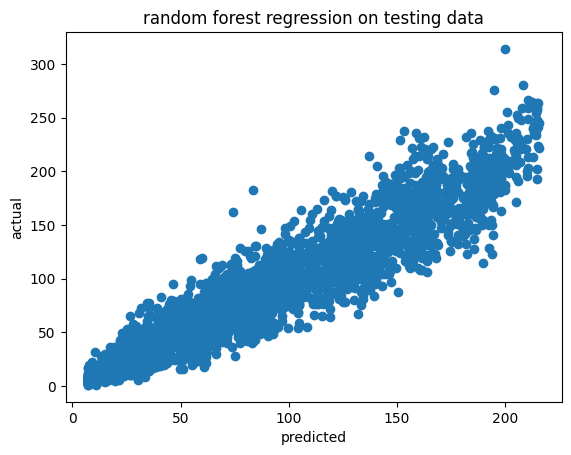

In [ ]:
plt.scatter(rf_result_test,Y_test)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("random forest regression on testing data")
plt.show()

In [ ]:
rf_acc_train=r2_score(rf_result_train,Y_train)
print("training accuracy ",rf_acc_train)
rf_acc_test=r2_score(rf_result_test,Y_test)
print("testing accuracy ",rf_acc_test)


training accuracy  0.8912573377396706
testing accuracy  0.8802377846163799


XGBOOST REGRESSOR

In [ ]:
#Xgboost Regression
xg = XGBRegressor()
xg.fit(X_train,Y_train)
xg_result_test=xg.predict(X_test)
print(xg_result_test)
xg_result_train=xg.predict(X_train)
print(xg_result_train)

[ 92.042015 234.94717   52.460262 ... 173.31287   26.949398  92.08405 ]
[ 11.69009   36.582905  29.28221  ...  90.21004  182.60004   55.711323]


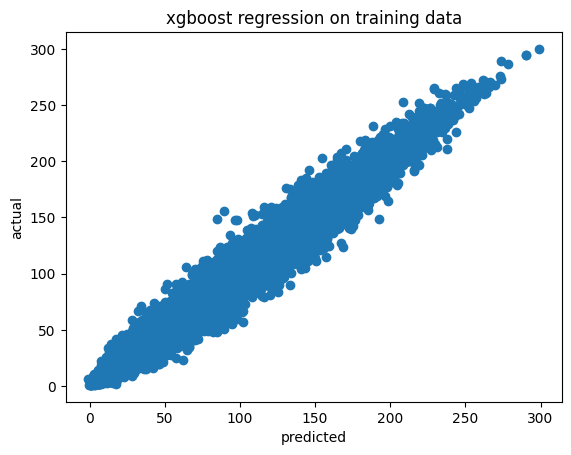

In [ ]:
plt.scatter(xg_result_train,Y_train)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("xgboost regression on training data")
plt.show()

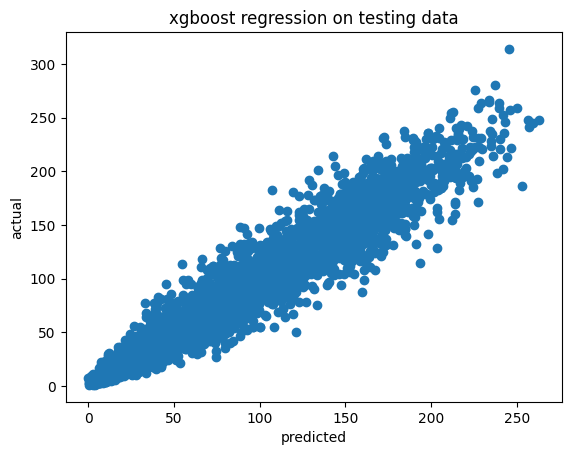

In [ ]:
plt.scatter(xg_result_test,Y_test)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("xgboost regression on testing data")
plt.show()

In [ ]:
xg_acc_train=r2_score(xg_result_train,Y_train)
print("training accuracy ",xg_acc_train)
xg_acc_test=r2_score(xg_result_test,Y_test)
print("testing accuracy ",xg_acc_test)


training accuracy  0.9691952962234544
testing accuracy  0.9129774769021044
